## Exploracion de datos ##

In [ ]:
import pandas as pd
import re
#NLTK
import nltk
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize
#from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize

In [2]:
df = pd.read_csv('tweetsEv2.csv') #loads csv file into pandas dataframe

In [3]:
Tweet_Texts=df['tweet'].values
 
# Converting the text column as a single string for wordcloud
Tweets_String=str(Tweet_Texts)
 
# Tweet Text cleaning
import re
 
#Convertir el todo el texto a minusculas
df['tweets_proc'] = df['tweet'].apply(lambda x: x.lower())
 
#Eliminar los usernames
#twitter_data["full_text"].apply(lambda x: len(str(x).split()))
df['tweets_proc'] = df['tweet'].apply(lambda x: re.sub(r'@\w+', ' ', x))
#Tweet_Texts_Cleaned=re.sub(r'@\w+', ' ', Tweet_Texts_Cleaned)
 
# Eliminar los usernames URLS
df['tweets_proc'] = df['tweet'].apply(lambda x: re.sub(r'http\S+', ' ', x))
#Tweet_Texts_Cleaned=re.sub(r'http\S+', ' ',Tweets_String)

#Eliminar los caracteres expeciales
df['tweets_proc'] = df['tweet'].apply(lambda x: re.sub(r'[^a-z A-Z]', ' ', x))
#Tweet_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',Tweet_Texts_Cleaned)
 
# Eliminar cualquier palabra que tenga menos de 3 caracteres
df['tweets_proc'] = df['tweet'].apply(lambda x: re.sub(r'\b\w{1,2}\b', ' ', x))
#Tweet_Texts_Cleaned= re.sub(r'\b\w{1,2}\b', '', Tweet_Texts_Cleaned)
 
# Stripping extra spaces in the text
#df['tweets_proc'] = df['tweet'].apply(lambda x: re.sub(r' +', ' ', x))
#Tweet_Texts_Cleaned= re.sub(r' +', ' ', Tweet_Texts_Cleaned)
#len(Tweet_Texts_Cleaned)

*Utilizamos **wordcloud** para graficar las palabras mas frecuentes en nuestros dataset*

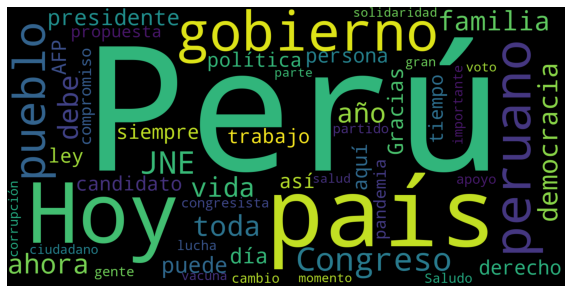

In [4]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt

# Crear una lista de stopwords
#customStopwords=list(STOPWORDS)+ ['cases','corona','virus','people','will']
customStopwords = stopwords.words('spanish')+ ['juanju','est','sac','ello','atenc','pereyra','elizabeth',
                                               'hinostroza','aclaró','solo','por', 'llegó','dijo','si','ser','https',
                                               'gracia','peru.','pais.','Minsa_Peru','@minsa_peru','q']

wordcloudimage = WordCloud(
                          max_words=50,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='black',
                          width=1600,
                          height=800
                          ).generate(str(df['tweets_proc'].to_list()))

plt.figure(figsize=(10,6))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage

#plt.savefig("Plot_pand.eps",format='eps')
plt.show()

## Analisis de la distribucion de texto ##

In [17]:
import string
#eng_stopwords = set(stopwords.words("spanish"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from shapely.geometry import Point
#import geopandas as gpd
#from geopandas import GeoDataFrame
from collections import defaultdict
from chart_studio import plotly
import plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
df = pd.read_excel("tweetS.xlsx")
twitter_data = pd.DataFrame()
twitter_data["full_text"] = df['tweet_sentence']

*Utilizamos una lista de algunos atributos, que podrian contribuir al analisis de datos.*

In [9]:
#twitter_data['count_sent']=twitter_data["full_text"].apply(lambda x: len(re.findall(".",str(x)))+1)
#Word count in each comment:
twitter_data['count_word']=twitter_data["full_text"].apply(lambda x: len(str(x).split()))
#Unique word count
twitter_data['count_unique_word']=twitter_data["full_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
twitter_data['count_letters']=twitter_data["full_text"].apply(lambda x: len(str(x)))
#punctuation count
twitter_data["count_punctuations"] =twitter_data["full_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
twitter_data["count_words_upper"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
twitter_data["count_words_title"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
twitter_data["count_stopwords"] = twitter_data["full_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in customStopwords]))
#Average length of the words
twitter_data["mean_word_len"] = twitter_data["full_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

*Obtenemos la correlacion de las variables obtenidas anteriormente*

In [52]:
twitter_data.describe().T

,count,mean,std,min,25%,50%,75%,max
count_word,2694.0,4.968077,2.011594,1.0,3.0,5.0,7.0,9.0
count_unique_word,2694.0,4.943950,1.990932,1.0,3.0,5.0,7.0,9.0
count_letters,2694.0,31.977357,12.764856,4.0,22.0,31.5,41.0,78.0
count_punctuations,2694.0,1.414254,0.835904,0.0,1.0,1.0,2.0,6.0
count_words_upper,2694.0,0.343356,1.124516,0.0,0.0,0.0,0.0,8.0
count_words_title,2694.0,1.146622,0.720266,0.0,1.0,1.0,1.0,6.0
count_stopwords,2694.0,1.955828,1.368271,0.0,1.0,2.0,3.0,6.0
mean_word_len,2694.0,6.272744,4.312684,2.2,4.6,5.5,6.6,71.0


*Establecemos graficamente la correlacion de las variables, sin embargo vemos que muchas no son significativamente informativas*

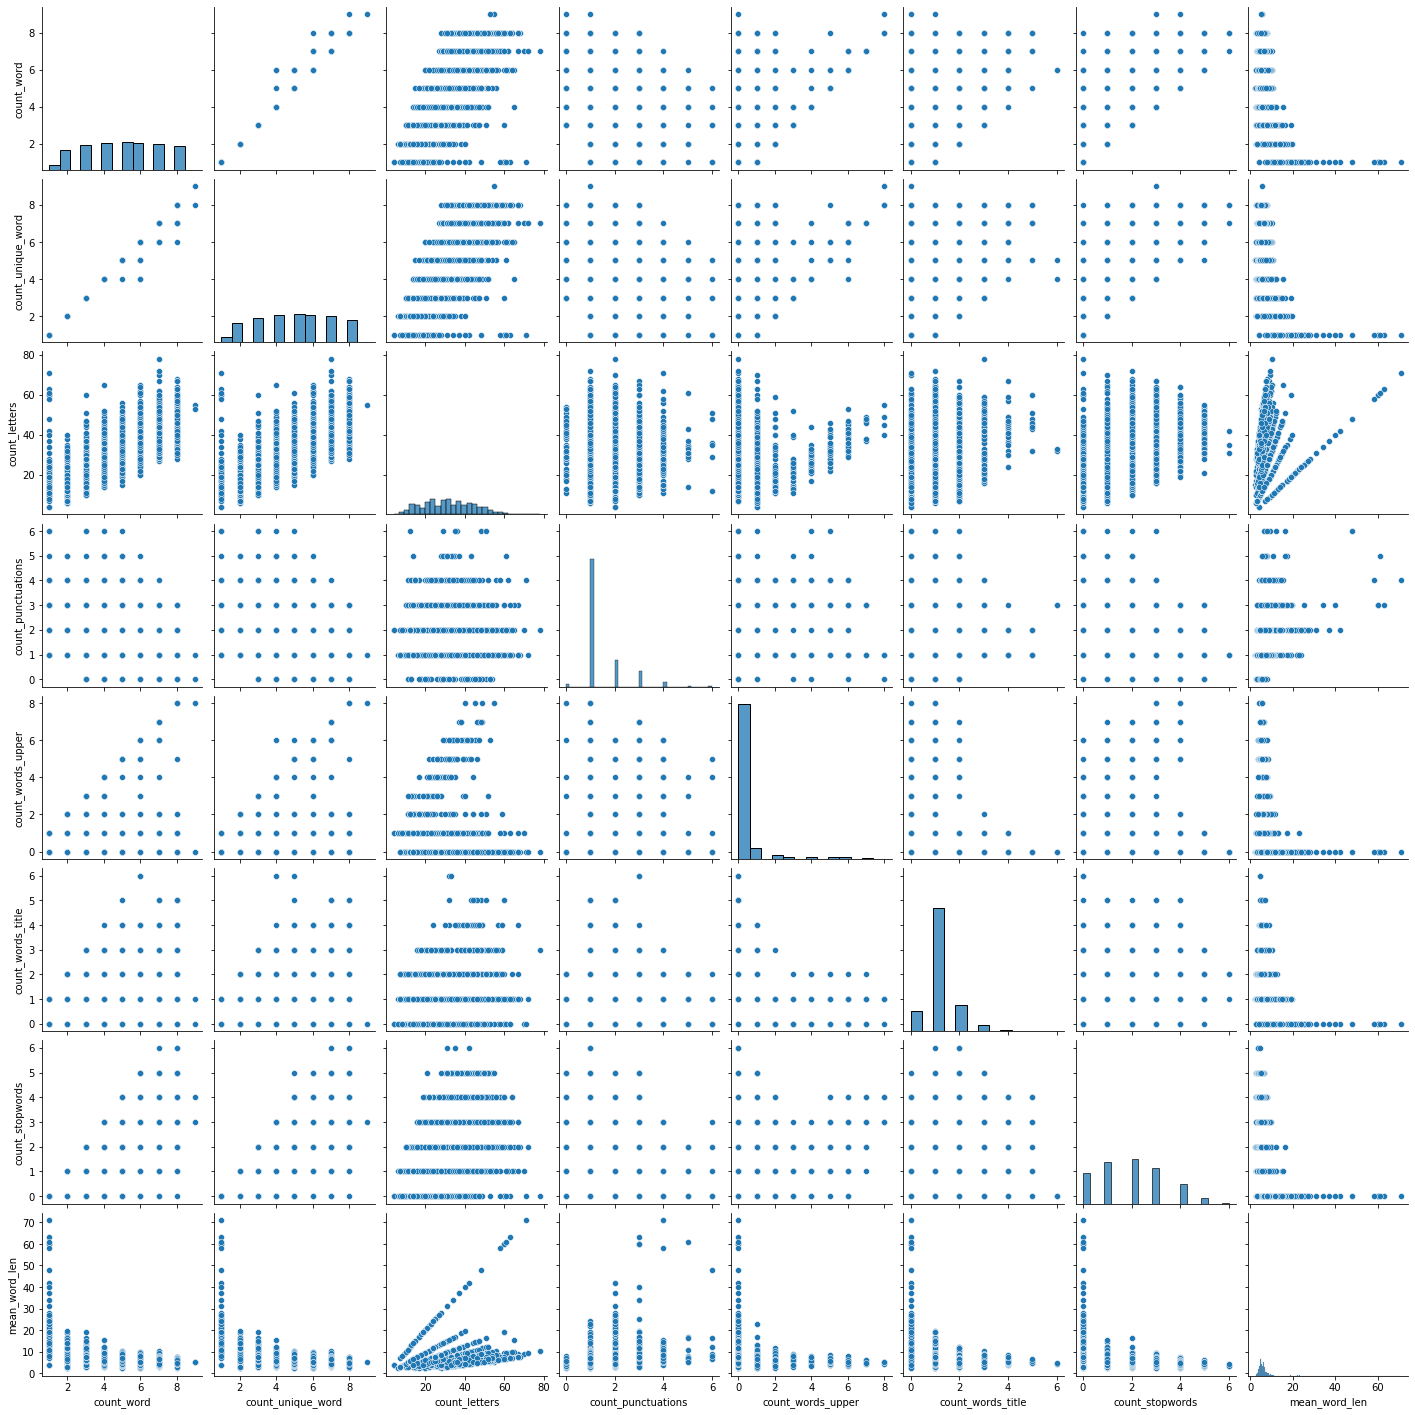

In [53]:
sample_df = twitter_data[['count_word','count_unique_word','count_letters','count_punctuations','count_words_upper','count_words_title','count_stopwords','mean_word_len' ]]
sns.pairplot(sample_df,palette="husl")
plt.savefig('pand_dist.pdf', dpi=100)
del sample_df

## Explorando N-grams##

In [22]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in customStopwords]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace


freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'green')


fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04)
#                         subplot_titles=["Frecuencia de palabras"])
fig.append_trace(trace0, 1, 1)

fig['layout'].update(height=600, width=900, paper_bgcolor='rgb(233,233,233)')
iplot(fig, filename='pand_word-plots.html')
#iplot.show()



**Para 1-grams**

In [24]:
fd_sort = fd_sorted[:20].sort_values(by = 'wordcount')
fd_sort.to_csv('wc.csv')

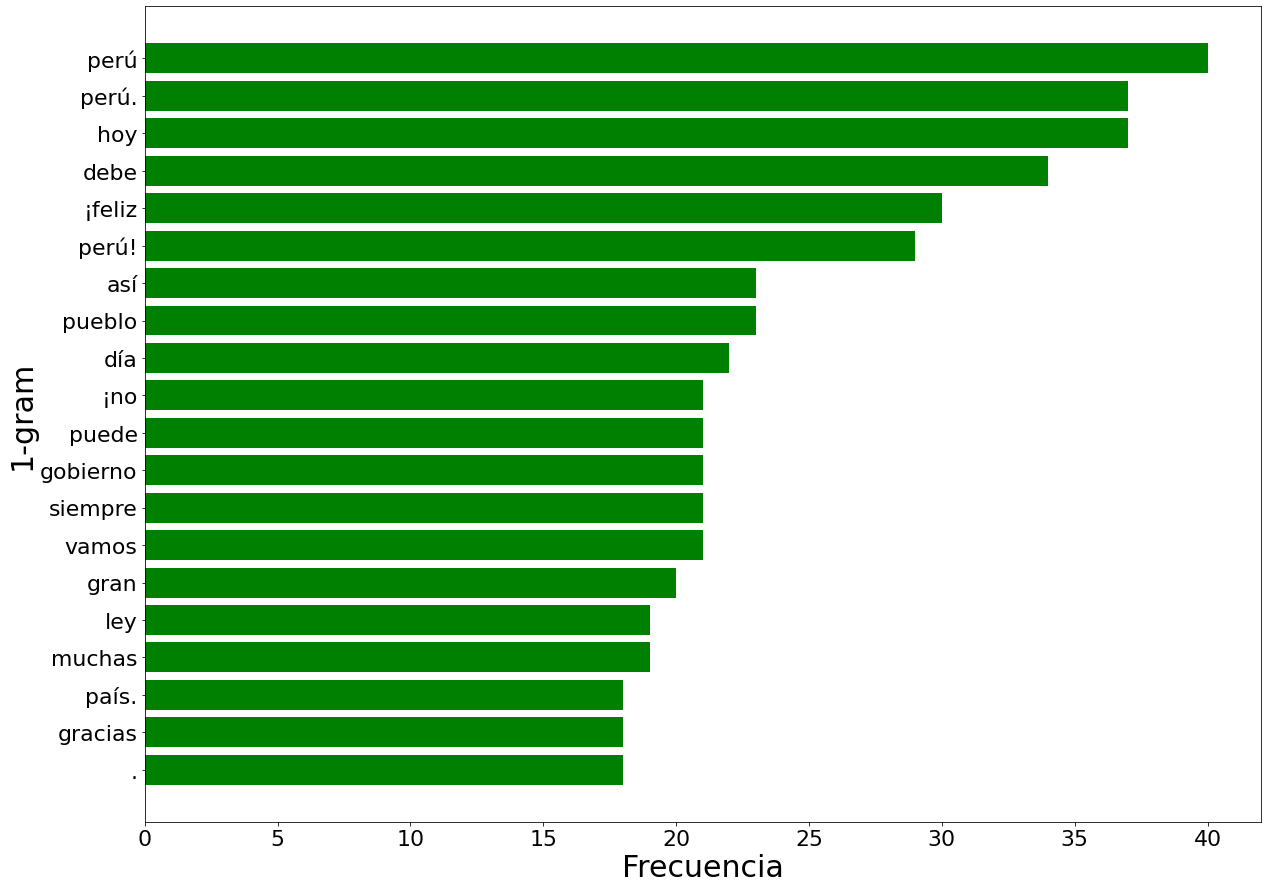

In [25]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(20,15))
y= fd_sort['word']
  
x= fd_sort['wordcount']  
plt.barh(y, x, color = 'green') 
  
plt.ylabel("1-gram", fontsize = 30) 
  
plt.xlabel("Frecuencia", fontsize = 30)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

#plt.title("Horizontal bar graph") 
#plt.figure(figsize=(300,300))
plt.savefig('pand_1gram.eps')
plt.show() 

**Para 2-grams**

In [13]:
freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(10), 'orange')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frecuencia de bigrams"
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=500, width=900, paper_bgcolor='rgb(233,233,233)')
iplot(fig, filename='word-plots')

C:\Users\claud\Anaconda3\lib\site-packages\plotly\tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



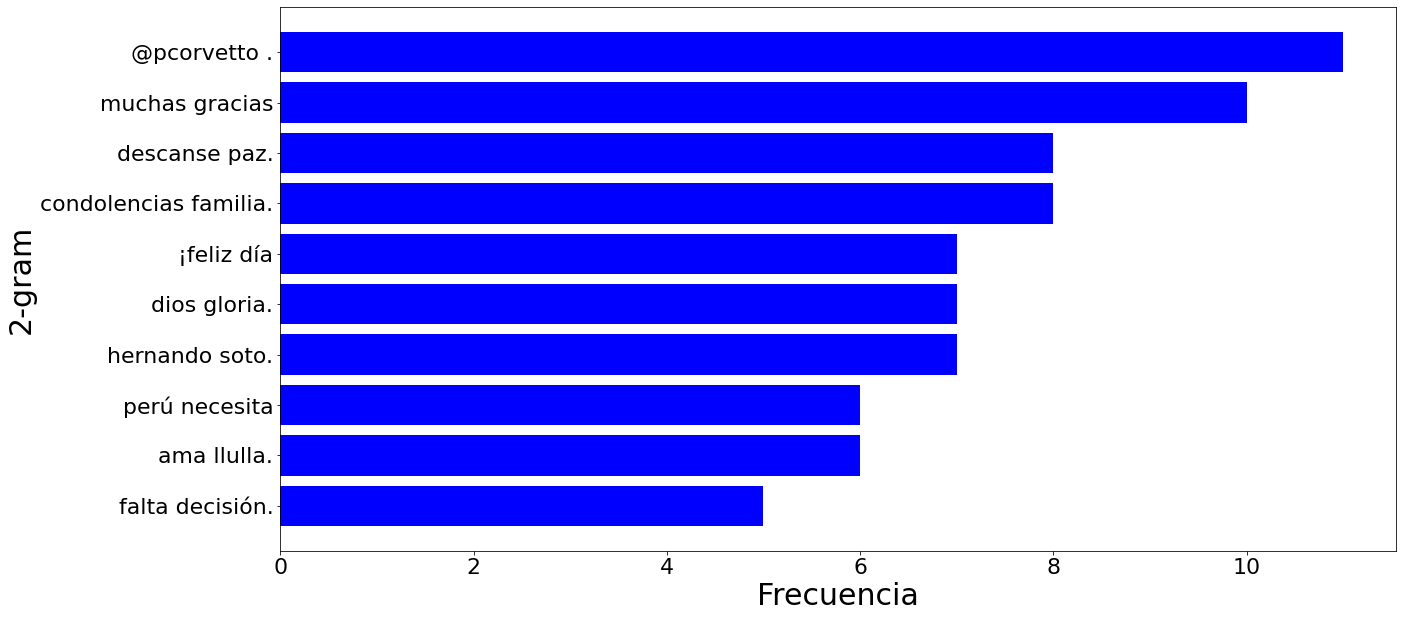

In [14]:
fd_sort = fd_sorted[:10].sort_values(by = 'wordcount')

plt.figure(figsize=(20,10))
y= fd_sort['word']
  
x= fd_sort['wordcount']  
plt.barh(y, x, color = 'blue') 
  
plt.ylabel("2-gram", fontsize = 30) 
  
plt.xlabel("Frecuencia", fontsize = 30)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

#plt.title("Horizontal bar graph") 
#plt.figure(figsize=(300,300))
plt.savefig('pand_bigram.eps')
plt.show() 

In [11]:
fd_sort = fd_sorted[:20].sort_values(by = 'wordcount')
fd_sort
#fd_sort.to_csv('wc.csv')

,word,wordcount
19,.,18
17,gracias,18
18,país.,18
16,muchas,19
15,ley,19
14,gran,20
13,vamos,21
12,siempre,21
11,gobierno,21
10,puede,21


**Para 3-grams**

In [15]:
freq_dict = defaultdict(int)
for sent in twitter_data["full_text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(30), 'blue')

fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frecuencia de trigrams"
                                          ])
fig.append_trace(trace0, 1, 1)
fig['layout'].update(height=600, width=900, paper_bgcolor='rgb(233,233,233)')
iplot(fig, filename='word-plots')

C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\backends\_backend_pdf_ps.py:109: RuntimeWarning:

Glyph 128227 missing from current font.

C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\backends\backend_ps.py:633: RuntimeWarning:

Glyph 128227 missing from current font.

C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning:

Glyph 128227 missing from current font.

C:\Users\claud\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning:

Glyph 128227 missing from current font.



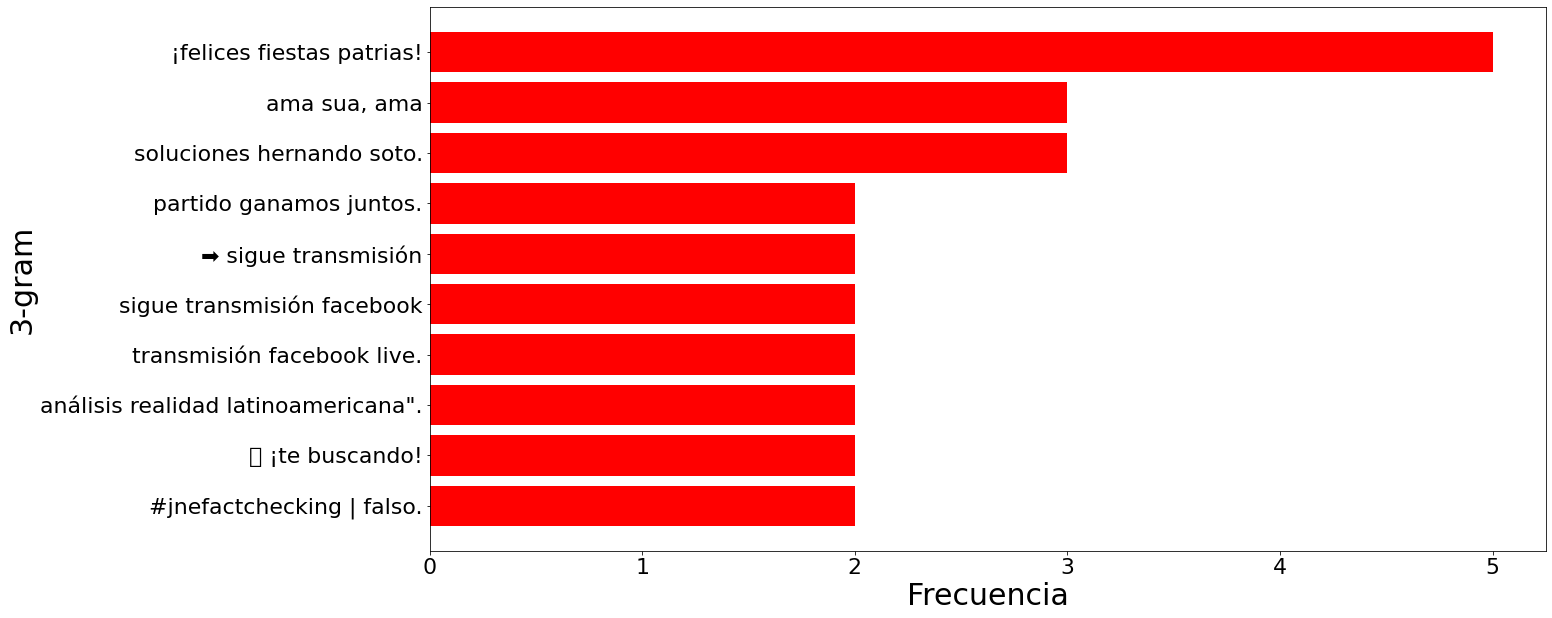

In [16]:
fd_sort = fd_sorted[:10].sort_values(by = 'wordcount')

plt.figure(figsize=(20,10))
y= fd_sort['word']
  
x= fd_sort['wordcount']  
plt.barh(y, x, color = 'red') 
  
plt.ylabel("3-gram", fontsize = 30) 
  
plt.xlabel("Frecuencia", fontsize = 30)

plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)

#plt.title("Horizontal bar graph") 
#plt.figure(figsize=(300,300))
plt.savefig('pand_trigram.eps')
plt.show() 